In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading the dataset

In [6]:
gtd=pd.read_csv('dataset\global_terrorism.csv', encoding = 'ISO-8859-1')
gtd.head(5)

C:\Users\Marcos Hiarley\AppData\Local\Temp\ipykernel_15080\1858388349.py:1: DtypeWarning: Columns (4,6,19,20,25,26,30,31,32,33,34,36,40,42,44,48,50,52,56,61,62,63,65,66,67,68,74,75,76,77,78,79,80,81,83,85,87,89,90,91,92,93,94,96,99,100,101,102,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,131,132,133,135,136,137) have mixed types. Specify dtype option on import or set low_memory=False.
  gtd=pd.read_csv('dataset\global_terrorism.csv', encoding = 'ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,-9,-9,1,1,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
gtd.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nperps,nperpcap,claimed,claimmode,weapsubtype4,nwoundte,property,propextent,Unnamed: 138,Unnamed: 139
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,110579.000000,112185.000000,115560.000000,19542.000000,71.000000,112849.000000,178527.000000,66219.000000,3.000000,1.0
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,67.773142,-3.240214e+02,1.451452,...,-65.034238,-1.742176,-0.033403,6.766810,10.746479,0.121915,-0.561865,3.144022,-3.000000,-9.0
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,1195.646627,2.048268e+05,0.995430,...,216.547059,13.794806,3.097592,3.779788,8.174382,1.777482,3.160196,0.872886,5.196152,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-33951.000000,-8.618590e+07,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,2.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.0
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.558831,4.661944e+00,1.000000,...,-99.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,3.000000,-4.500000,-9.0
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.502407,4.329418e+01,1.000000,...,-99.000000,0.000000,0.000000,7.000000,8.000000,0.000000,1.000000,3.000000,0.000000,-9.0
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.717705,6.876744e+01,1.000000,...,1.000000,0.000000,0.000000,8.000000,16.000000,0.000000,1.000000,4.000000,0.000000,-9.0
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,55425.000000,1.664580e+05,5.000000,...,25000.000000,406.000000,25.000000,30.000000,28.000000,200.000000,100.000000,8.000000,0.000000,-9.0


In [8]:
gtd.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region

In [9]:
gtd.isnull().sum()

eventid              0
iyear                0
imonth               0
iday                 0
approxdate      172452
                 ...  
Unnamed: 135    180777
Unnamed: 136    181512
Unnamed: 137    181672
Unnamed: 138    181688
Unnamed: 139    181690
Length: 140, dtype: int64

# Renaming the column names for our convenience

In [10]:
gtd.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type'
                    },inplace=True)

# Selecting those columns which are helpful in our analysis

In [11]:
gtd = gtd[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','summary','Group','Target_type','Weapon_type','motive','success']]

# Detecting for null values

In [12]:
gtd.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10234
Wounded         18992
Target            643
summary         66129
Group             445
Target_type        23
Weapon_type        72
motive         131451
success            16
dtype: int64

# Dropping the null values because here we are only taking those terrorist missions which we have almost complete information of where, how and why it occured. (It is not to be confused that the terrorist missions which have been dropped due to incomplete information(NaN) are of no use, but for educational purposes we have taken the missions which have almost complete information).

In [13]:
gtd_new=gtd.dropna(axis=0)

In [15]:
gtd_new.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,summary,Group,Target_type,Weapon_type,motive,success
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,Armed Assault,0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,1.0
8,197001020003,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,1.0
9,197001030001,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,1.0
11,197001060001,1970,1,6,United States,North America,Colorado,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,1.0
14,197001090002,1970,1,9,United States,North America,Puerto Rico,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,1.0


# Printing the top 10 countries affected by terrorist attacks along with number of terrorist attacks from 1970-2017

In [16]:
# Number of attacks per country
attacks_per_country = gtd_new['Country'].value_counts()
print(attacks_per_country.head(10))  # Top 10 countries
# Number of attacks per year
attacks_per_year = gtd_new['Year'].value_counts().sort_index()
print(attacks_per_year)



Country
Iraq             8799
India            5410
Pakistan         4891
Afghanistan      3197
Philippines      2237
Thailand         1776
Russia           1486
Colombia         1387
United States    1375
Algeria          1182
Name: count, dtype: int64
Year
1970     220
1971     111
1972      37
1973      25
1974      32
1975      25
1976      15
1977      18
1978      36
1979      10
1980      23
1981      19
1982      26
1983      18
1984      46
1985      24
1986      34
1987      27
1988      28
1989      29
1990      27
1991      28
1992      27
1994      34
1995      25
1996      13
1997      20
1998     751
1999    1225
2000    1583
2001    1760
2002    1194
2003    1119
2004     992
2005    1757
2006    2376
2007    2859
2008    4315
2009    4445
2010    4720
2011    4873
2012    1888
2013    2372
2014    1890
2015    1777
2016    1690
2017    1652
Name: count, dtype: int64


# We can see that Iraq has had the most terror attacks followed by India. The least terror attacks have been at Djibouti, Papua New Guinea and other smaller countries(not shown above).

In [17]:
max_year = attacks_per_year.idxmax()
print("Year with the most attacks:", max_year)

Year with the most attacks: 2011


# 2011 had the most terror attacks in the world as seen above and also in the graph below.

In [18]:
year_attacks = gtd_new.groupby('Year').size().reset_index(name='count')

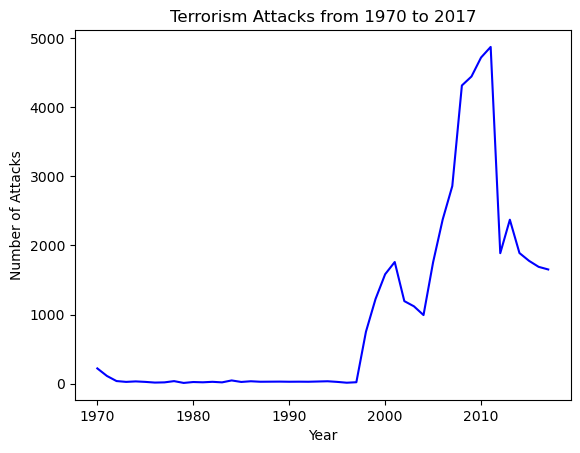

In [19]:
sns.lineplot(x='Year', y='count', data=year_attacks, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks from 1970 to 2017")
plt.show()

In [20]:
year_attacks_region = gtd_new.groupby(['Year','Region']).size().reset_index(name='count')

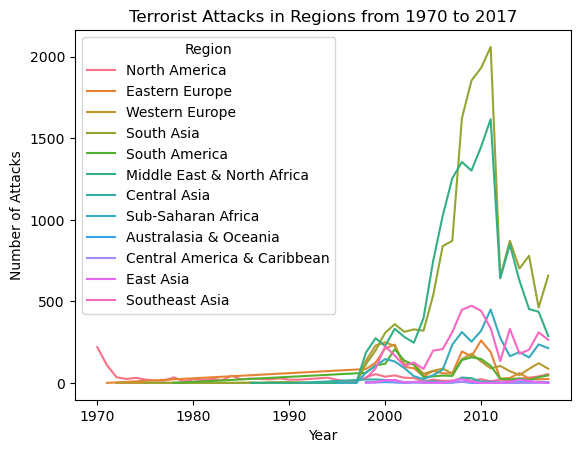

In [21]:
sns.lineplot(x='Year',y='count',hue='Region',data=year_attacks_region)
plt.title('Terrorist Attacks in Regions from 1970 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

# South Asia had witnessed the most terror attacks from 2007/2008-2011 while The Middle East and North Africa experienced a significant increase in terrorist attacks during the period, while other regions like North America saw relatively lower levels.

C:\Users\Marcos Hiarley\AppData\Local\Temp\ipykernel_15080\1250135332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attacks_per_region.values, y=attacks_per_region.index, palette="Greens_r")


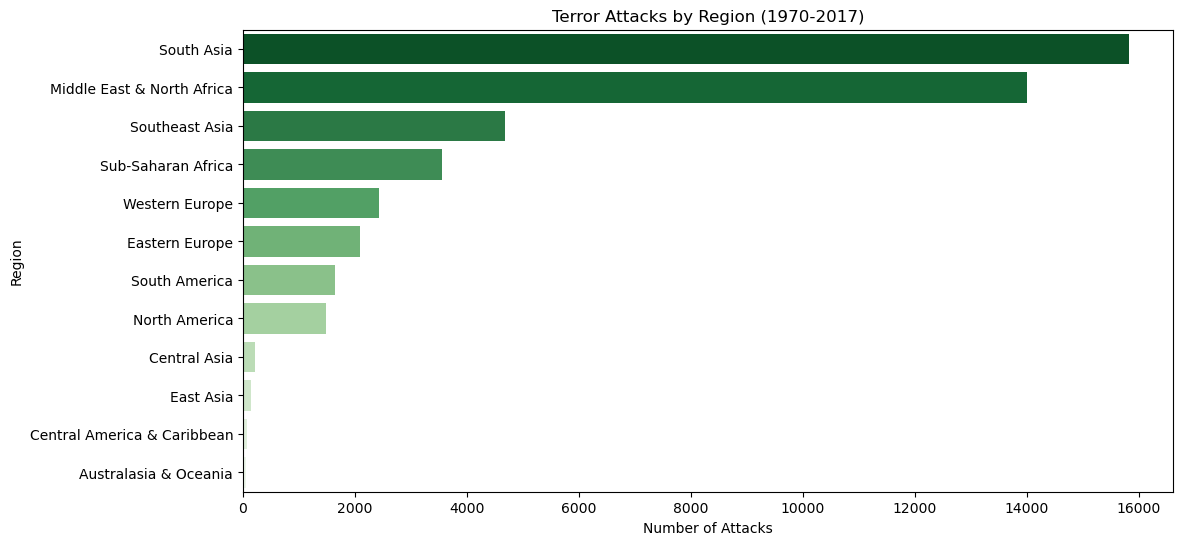

In [22]:
# Regional breakdown of attacks
attacks_per_region = gtd_new['Region'].value_counts()

# Plot regional distribution of attacks
plt.figure(figsize=(12,6))
sns.barplot(x=attacks_per_region.values, y=attacks_per_region.index, palette="Greens_r")
plt.title('Terror Attacks by Region (1970-2017)')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()


AttackType
Bombing/Explosion                      23401
Armed Assault                          10940
Facility/Infrastructure Attack          3693
Hostage Taking (Kidnapping)             3458
Assassination                           3015
Unknown                                 1014
Unarmed Assault                          357
Hostage Taking (Barricade Incident)      197
Hijacking                                140
Name: count, dtype: int64


C:\Users\Marcos Hiarley\AppData\Local\Temp\ipykernel_15080\2503549734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_types.values, y=attack_types.index, palette="Reds_r")


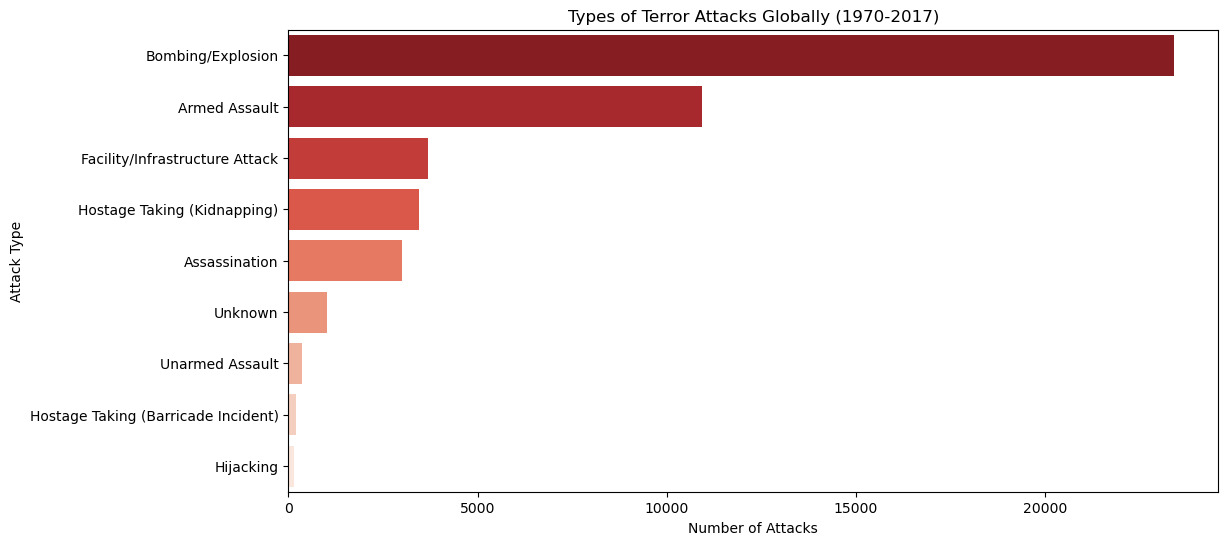

In [23]:
# Attack types
attack_types = gtd_new['AttackType'].value_counts()
print(attack_types)

# Plot attack types
plt.figure(figsize=(12,6))
sns.barplot(x=attack_types.values, y=attack_types.index, palette="Reds_r")
plt.title('Types of Terror Attacks Globally (1970-2017)')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()


# The most number of attacks(~ 24,000 ) were carried out by means of Bombing/Explosion, followed by Armed Assault, while the least were by Hijacking(~ 150 ).

C:\Users\Marcos Hiarley\AppData\Local\Temp\ipykernel_15080\900119923.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_types.values, y=target_types.index, palette="Blues_r")


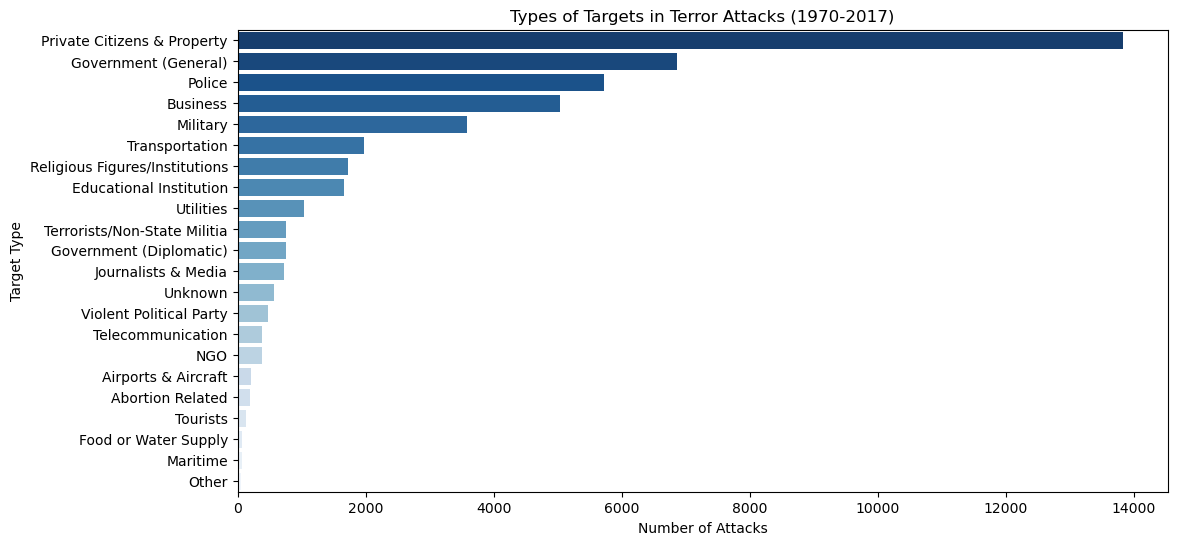

In [24]:
# Target types
target_types = gtd_new['Target_type'].value_counts()

# Plot target types
plt.figure(figsize=(12,6))
sns.barplot(x=target_types.values, y=target_types.index, palette="Blues_r")
plt.title('Types of Targets in Terror Attacks (1970-2017)')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.show()


# Private Citizens and Property were mostly targeted during the terror attacks while Tourists and Others were not as much targeted as the rest.

C:\Users\Marcos Hiarley\AppData\Local\Temp\ipykernel_15080\3912405374.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_types.values, y=weapon_types.index, palette="Purples_r")


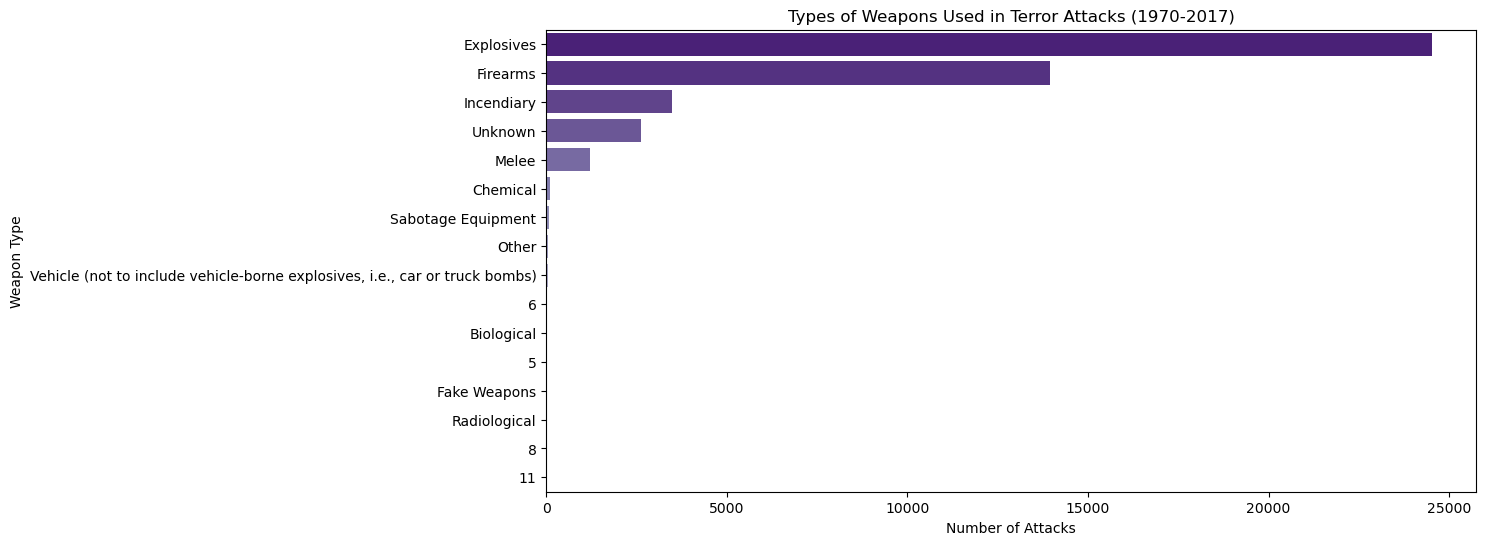

In [25]:
# Weapon types
weapon_types = gtd_new['Weapon_type'].value_counts()

# Plot weapon types
plt.figure(figsize=(12,6))
sns.barplot(x=weapon_types.values, y=weapon_types.index, palette="Purples_r")
plt.title('Types of Weapons Used in Terror Attacks (1970-2017)')
plt.xlabel('Number of Attacks')
plt.ylabel('Weapon Type')
plt.show()


# Explosives were the go-to weapon used in terror attacks which was almost 25,000 followed by Firearms (~ 15000).

C:\Users\Marcos Hiarley\AppData\Local\Temp\ipykernel_15080\2289642680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=groups.values, y=groups.index, palette="Oranges_r")


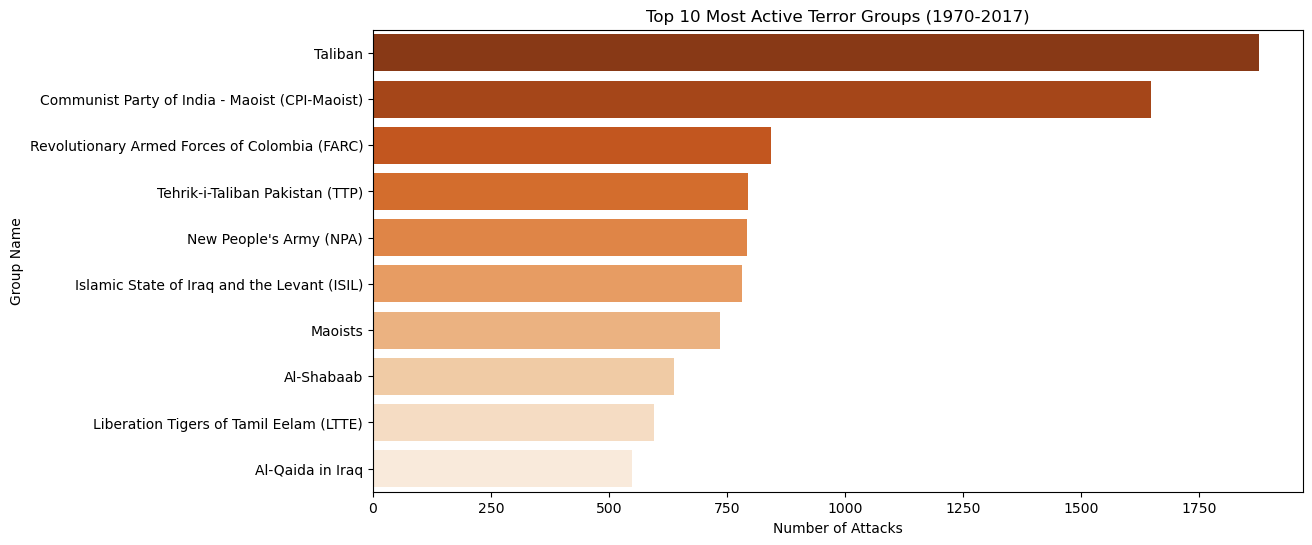

In [26]:
# Terror groups involved
groups = gtd_new['Group'].value_counts().drop('Unknown').head(10)

# Plot most active terror groups
plt.figure(figsize=(12,6))
sns.barplot(x=groups.values, y=groups.index, palette="Oranges_r")
plt.title('Top 10 Most Active Terror Groups (1970-2017)')
plt.xlabel('Number of Attacks')
plt.ylabel('Group Name')
plt.show()


# The Taliban was and still is the number 1 active terror group followed by the Communist Party of India-Maoist (CPI-Maoist), and the least active terror group is Al-Qaida in Iraq.

In [27]:
# Total number of casualties (killed + wounded)
gtd_new['casualties'] = gtd_new['Killed'].fillna(0) + gtd_new['Wounded'].fillna(0)

# Casualties per year
casualties_per_year = gtd_new.groupby('Year')['casualties'].sum()

# Plot casualties over time
plt.figure(figsize=(10,6))
plt.plot(casualties_per_year, color='black')
plt.title('Total Casualties in Terror Attacks Globally (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.show()

year_max_casualties = casualties_per_year.idxmax()
print("Year with the most casualties:", year_max_casualties)


TypeError: can only concatenate str (not "float") to str

# 2007 had the most number of casualties (killed + wounded) with almost 34,000 people wither killed or wounded.

In [ ]:
number_of_attempts = gtd_new.groupby('Year').size().reset_index(name='count')
number_of_attempts

In [ ]:
sum_of_attacks = number_of_attempts['count'].sum()
print('Total number of attacks all over the world:', sum_of_attacks)

In [ ]:
succ = gtd_new.groupby(['success']).size().reset_index(name='count')
succ['percentage'] =  succ['count']/sum_of_attacks *100
succ

# From 1970-2017 almost 91% of terror attacks were successful and only 9% were unsuccessful which is equally crazy and sad. (Reminder: This is taking into account the terror attacks which have complete information)

In [ ]:
weapon_success = gtd_new.groupby(['AttackType', 'success']).size().unstack(fill_value=0)
weapon_success['total'] = weapon_success.sum(axis=1)
weapon_success['success_percentage'] = (weapon_success[1] / weapon_success['total']) * 100
weapon_success['failure_percentage'] = (weapon_success[0] / weapon_success['total']) * 100
weapon_success

In [ ]:
# Plotting the bar graph with custom styling
plt.figure(figsize=(12, 8))

# Use a custom color palette for better differentiation
colors = ["#72A2C0", "#E88D67"]  # You can choose your own colors for success and failure

weapon_success[['success_percentage', 'failure_percentage']].plot(kind='bar', stacked=True, color=colors)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the title and axis labels
plt.title('Success and Failure by Weapon Type', fontsize=16)
plt.xlabel('Weapon Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc='lower right')
plt.show()

#  When analyzing the data, it becomes evident that Hostage Taking (Kidnapping) exhibits the highest success percentage, despite having fewer recorded incidents. This is closely followed by Barricade Incidents, while Assassination shows the lowest success rate. Additionally, although Bombing/Explosions represent a larger number of incidents, the success rate, although relatively high, is lower than that of Kidnapping or Barricade Incidents.  

# Now, we will turn our focus on three terror attack prone countries - India, USA and Iraq.

In [ ]:
# Filter data for India,USA and Iraq
gtd_india = gtd_new[gtd_new['Country'] == 'India']
gtd_usa = gtd_new[gtd_new['Country'] == 'United States']
gtd_iraq= gtd_new[gtd_new['Country'] == 'Iraq']
# Display basic info for each country
print(gtd_india.info())
print(gtd_usa.info())
print(gtd_iraq.info())

In [ ]:
gtd_india.head(5)

In [ ]:
gtd_usa.head(5)

In [ ]:
gtd_iraq.head(5)

In [ ]:
# Group by year for India and USA and Iraq
india_attacks = gtd_india.groupby('Year').size()
usa_attacks = gtd_usa.groupby('Year').size()
iraq_attacks = gtd_iraq.groupby('Year').size()

# Plot attacks over time
plt.figure(figsize=(10,6))
plt.plot(india_attacks, label='India')
plt.plot(usa_attacks, label='USA')
plt.plot(iraq_attacks, label='Iraq')
plt.title('Number of Terror Attacks (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend()
plt.show()


#  Between 1970 and 1997, India experienced minimal terror attacks, and a similar trend was observed in Iraq between 1970 and 2002. Conversely, the United States reported nearly 200 attacks in the 1970s, when it went down and remained relatively consistent until 2017.  

In [ ]:
# Count attack types in India and USA and Iraq
india_attack_types = gtd_india['AttackType'].value_counts()
usa_attack_types = gtd_usa['AttackType'].value_counts()
iraq_attack_types = gtd_iraq['AttackType'].value_counts()
# Plot attack types
india_attack_types.plot(kind='bar', title='Attack Types in India')
plt.show()

usa_attack_types.plot(kind='bar', title='Attack Types in USA')
plt.show()

iraq_attack_types.plot(kind='bar', title='Attack Types in Iraq')
plt.show()

In [ ]:
# Plotting target types and weapon types
gtd_india['Target_type'].value_counts().plot(kind='bar', title='Targets in India')
plt.show()

gtd_usa['Target_type'].value_counts().plot(kind='bar', title='Targets in USA')
plt.show()

gtd_iraq['Target_type'].value_counts().plot(kind='bar', title='Targets in Iraq')
plt.show()

gtd_india['Weapon_type'].value_counts().plot(kind='bar', title='Weapon Types in India')
plt.show()

gtd_usa['Weapon_type'].value_counts().plot(kind='bar', title='Weapon Types in USA')
plt.show()

gtd_iraq['Weapon_type'].value_counts().plot(kind='bar', title='Weapon Types in Iraq')
plt.show()

In [ ]:
India_attacks = gtd_india['eventid'].count()
print('There were',India_attacks ,'attacks in India.')

In [ ]:
India_success = gtd_india.groupby('success').size().reset_index(name='count')
India_success['percentage'] = India_success['count'] / India_attacks * 100
India_success

# Out of the 5427 attacks in India, almost 91% have been successful while 9% have been unsuccessful. 😲

In [ ]:
USA_attacks = gtd_usa['eventid'].count()
print('There were',USA_attacks ,'attacks in USA.')

In [ ]:
USA_success = gtd_usa.groupby('success').size().reset_index(name='count')
USA_success['percentage'] = USA_success['count'] / USA_attacks * 100
USA_success

# Out of the 1426 attacks in USA, 83% have been successful while 17% have been unsuccessful.

In [ ]:
Iraq_attacks = gtd_iraq['eventid'].count()
print('There were',Iraq_attacks ,'attacks in Iraq.')

In [ ]:
Iraq_success = gtd_iraq.groupby('success').size().reset_index(name='count')
Iraq_success['percentage'] = Iraq_success['count'] / Iraq_attacks * 100
Iraq_success

# Out of the 8810 attacks in Iraq, 95% have been successful and only 5% have been unsuccessful☠️

In [ ]:
attack_types_India = gtd_india.groupby(['AttackType','success']).size().reset_index(name='count')
attack_types_India

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AttackType', y='count', hue='success', data=attack_types_India, palette={0: "red", 1: "blue"})
plt.title("Facility")
plt.xticks(rotation=45)

# As we can see, Bombing/Explosion has had the most impact in India in terms of success rate followed by Armed Assault. Hijacking has had the lowest success rate.

In [ ]:
kills_India = gtd_india.groupby('AttackType')[['Killed']].sum().reset_index()
kills_India

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='AttackType', y='Killed', data=kills_India)

# Almost 4000 people were killed by means of Armed Assault, which is followed by Bombing/Explosion. We can draw a conclusion that although the number of operations and success rates were high for Bombing/Explosion, the casualties(killed) were lesser than compared to Armed Assault.

In [ ]:
attack_types_USA = gtd_usa.groupby(['AttackType','success']).size().reset_index(name='count')
attack_types_USA

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AttackType', y='count', hue='success', data=attack_types_USA, palette={0: "red", 1: "blue"})
plt.title("Facility")
plt.xticks(rotation=45)

# Armed assaults, Bombing/Explosion and Facility/infrastructure attacks are the most common threats to facilities in USA. Hijacking and hostage-taking incidents are less frequent but more successful. 

In [ ]:
kills_USA = gtd_usa.groupby('AttackType')[['Killed']].sum().reset_index()
kills_USA

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='AttackType', y='Killed', data=kills_USA)

# We can see that Hijacking dealt the most casualties in USA.

In [ ]:
attack_types_Iraq = gtd_iraq.groupby(['AttackType','success']).size().reset_index(name='count')
attack_types_Iraq

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='AttackType', y='count', hue='success', data=attack_types_Iraq, palette={0: "red", 1: "blue"})
plt.title("Facility")
plt.xticks(rotation=45)

# As we can see, Bombing/Explosion has had the most impact in Iraq in terms of success rate followed by Armed Assault. Hijacking and Infrastructure attack has had the lowest success rate.

In [ ]:
kills_Iraq = gtd_usa.groupby('AttackType')[['Killed']].sum().reset_index()
kills_Iraq

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x='AttackType', y='Killed', data=kills_Iraq)

# Hijacking had dealt the most casualties in Iraq.

# CONCLUSION

Terrorist attacks around the world are increasingly problematic. 89% of attacks have been successful and 11% unsuccessful, with bombing/ explosion causing the most casualties. South Asia and Middle East are the most affected by terrorist attacks.